@author: Ariana CARNIELLI et Ivan KACHAIKIN
    
## Tests pour le projet de MOGPL 2019-2020

Ce notebook réalise des tests à l'aide des fonctions du fichier `fonctionsTest.py`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fonctionsTest import EvaluationGainSequentiel, EvaluationGainSimultane,\
    EvaluationVictoiresFonctionD, EvaluationVictoiresFonctionN
from jeu import JeuSequentiel, JeuSimultane
from strategie import StrategieAveugle, StrategieOptimaleSequentielle,\
    StrategieAleatoire, StrategieHumaine, StrategieOptimaleSimultaneeTour,\
    StrategieOptimaleSimultanee

### Jeu séquentiel

Visualisation des matrices d'espérance de gain et de la stratégie optimale pour le jeu séquentiel :

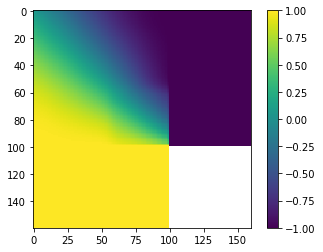

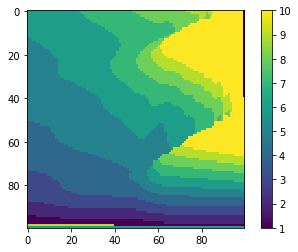

In [2]:
jeu = JeuSequentiel(10, 100)
s = StrategieOptimaleSequentielle(jeu)
eg, opt = s._esperanceGain()

fig, ax = plt.subplots()
egColors = ax.imshow(eg)
fig.colorbar(egColors)

fig, ax = plt.subplots()
optColors = ax.imshow(opt)
fig.colorbar(optColors);

Calcul du gain moyen pour différentes stratégies :

In [3]:
D = 10
N = 100
nbFois = 1000000
EG1 = EvaluationGainSequentiel([StrategieAveugle, StrategieOptimaleSequentielle, StrategieAleatoire], D, N, nbFois)
np.savez("EG1_Sequentiel.npz", D = D, N = N, nbFois = nbFois, EG1 = EG1)

 32%|██████████████████████▊                                                | 321167/1000000 [04:51<09:01, 1254.30it/s]

KeyboardInterrupt: 

In [ ]:
data = np.load("EG1_Sequentiel.npz")
D = data["D"]
N = data["N"]
nbFois = data["nbFois"]
EG1 = data["EG1"]
print(EG1)

Simulation de deux stratégies en fonction de $D$ à $N$ fixé :

In [ ]:
D = np.arange(2, 15)
N = 100
nbFois = 100000
nbVic1, nbVic2 = EvaluationVictoiresFonctionD(JeuSequentiel, \
    StrategieOptimaleSequentielle, StrategieAveugle, D, N, nbFois)
np.savez("VictoiresSequentielFonctionD.npz", D = D, N = N, nbFois = nbFois, nbVic1 = nbVic1, nbVic2 = nbVic2)

In [ ]:
data = np.load("VictoiresSequentielFonctionD.npz")
D = data["D"]
N = data["N"]
nbFois = data["nbFois"]
nbVic1 = data["nbVic1"]
nbVic2 = data["nbVic2"]
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(D, (nbVic1 - nbVic2)/nbFois)
ax.set_xlabel("D")
ax.set_ylabel("Gain du joueur 1")
ax.set_title("Gain à $N$ fixé en fonction de $D$")
ax.set_ylim([0, 0.25])
ax.set_yticks(np.linspace(0, 0.25, 6))
fig.show()

Simulation de deux stratégies en fonction de $N$ à $D$ fixé :

In [ ]:
D = 10
N = np.array([20, 50, 100, 200, 500, 1000, 2000])
nbFois = 100000
nbVic1, nbVic2 = EvaluationVictoiresFonctionN(JeuSequentiel, \
    StrategieOptimaleSequentielle, StrategieAveugle, D, N, nbFois)
np.savez("VictoiresSequentielFonctionN.npz", D = D, N = N, nbFois = nbFois, nbVic1 = nbVic1, nbVic2 = nbVic2)

In [ ]:
data = np.load("VictoiresSequentielFonctionN.npz")
D = data["D"]
N = data["N"]
nbFois = data["nbFois"]
nbVic1 = data["nbVic1"]
nbVic2 = data["nbVic2"]
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(N, (nbVic1 - nbVic2)/(nbVic1 + nbVic2))
ax.set_xlabel("N")
ax.set_ylabel("Gain du joueur 1")
ax.set_title("Gain à $D$ fixé en fonction de $N$")
ax.set_ylim([0, 0.25])
ax.set_yticks(np.linspace(0, 0.25, 6))
ax.set_xscale("log")
ax.set_xticks(N)
fig.show()

### Jeu simultané en un tour

Matrice de gains de la stratégie optimale simultanée à un tour :

In [ ]:
D = 3
j = JeuSimultane(D, 1)
s = StrategieOptimaleSimultaneeTour(j)
print(s._EG1[1:, 1:])

Stratégies optimales pour quelques valeurs de $D$ :

In [ ]:
for D in range(2, 7):
    j = JeuSimultane(D, 1)
    s = StrategieOptimaleSimultaneeTour(j)
    print("D = {}: P =".format(D), s._strategie[1:])

Calcul du gain moyen pour différentes stratégies :

In [ ]:
D = 10
N = 1
nbFois = 1000000
EG1 = EvaluationGainSimultane([StrategieAveugle, StrategieOptimaleSimultaneeTour, StrategieAleatoire], D, N, nbFois)
np.savez("EG1_SimultaneTour.npz", D = D, N = N, nbFois = nbFois, EG1 = EG1)

In [ ]:
data = np.load("EG1_SimultaneTour.npz")
D = data["D"]
N = data["N"]
nbFois = data["nbFois"]
EG1 = data["EG1"]
print(EG1)

_Remarque :_ Seul le bloc triangulaire inférieur est calculé ci-dessous car le jeu simultané est symétrique.

Simulation de deux stratégies en fonction de $D$ à $N$ fixé :

In [ ]:
D = np.arange(2, 11)
N = 1
nbFois = 1000000
nbVic1, nbVic2 = EvaluationVictoiresFonctionD(JeuSimultane, \
    StrategieOptimaleSimultaneeTour, StrategieAveugle, D, N, nbFois)
np.savez("VictoiresSimultaneUnTourFonctionD", D = D, N = N, nbFois = nbFois, nbVic1 = nbVic1, nbVic2 = nbVic2)

In [ ]:
data = np.load("VictoiresSimultaneUnTourFonctionD.npz")
D = data["D"]
N = data["N"]
nbFois = data["nbFois"]
nbVic1 = data["nbVic1"]
nbVic2 = data["nbVic2"]

fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(D, (nbVic1 - nbVic2)/nbFois)
ax.set_xlabel("D")
ax.set_ylabel("Gain du joueur 1")
ax.set_title("Gain en fonction de $D$")
#ax.set_ylim([0, 0.25])
#ax.set_yticks(np.linspace(0, 0.25, 6))
fig.show()

fig, ax = plt.subplots(figsize = (5, 5))
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(D, nbVic1/nbFois*100, label="Joueur 1")
ax.plot(D, nbVic2/nbFois*100, label="Joueur 2")
ax.plot(D, (nbFois - nbVic1 - nbVic2)/nbFois*100, label="Match nul")
ax.set_xlabel("D")
ax.set_ylabel("Pourcentage de victoire")
ax.set_title("Pourcentage de victoire en fonction de $D$")
ax.set_ylim([10, 50])
#ax.set_yticks(np.linspace(0, 0.25, 6))
ax.legend()
fig.show()

### Jeu simultané en plusieurs tours

Visualisation de la matrice d'espérance de gain pour le jeu simultané :

In [ ]:
jeu = JeuSimultane(10, 100)
s = StrategieOptimaleSimultanee(jeu)
eg, opt = s._esperanceGain()

fig, ax = plt.subplots()
egColors = ax.imshow(eg)
fig.colorbar(egColors)

Calcul du gain moyen pour différentes stratégies :

In [ ]:
D = 10
N = 100
nbFois = 1000000
EG1 = EvaluationGainSimultane([StrategieAveugle, StrategieAleatoire,\
                               StrategieOptimaleSequentielle, StrategieOptimaleSimultanee], D, N, nbFois)
np.savez("EG1_Simultane.npz", D = D, N = N, nbFois = nbFois, EG1 = EG1)

In [ ]:
data = np.load("EG1_Simultane.npz")
D = data["D"]
N = data["N"]
nbFois = data["nbFois"]
EG1 = data["EG1"]
print(EG1)